# TASK 1 :- TITANIC SURVIVAL PREDICTION

# Data description


- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# Import libraries

In [122]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import and read data

In [123]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


# Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

## Data types, missing data and summary statistics

In [129]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [130]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [131]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

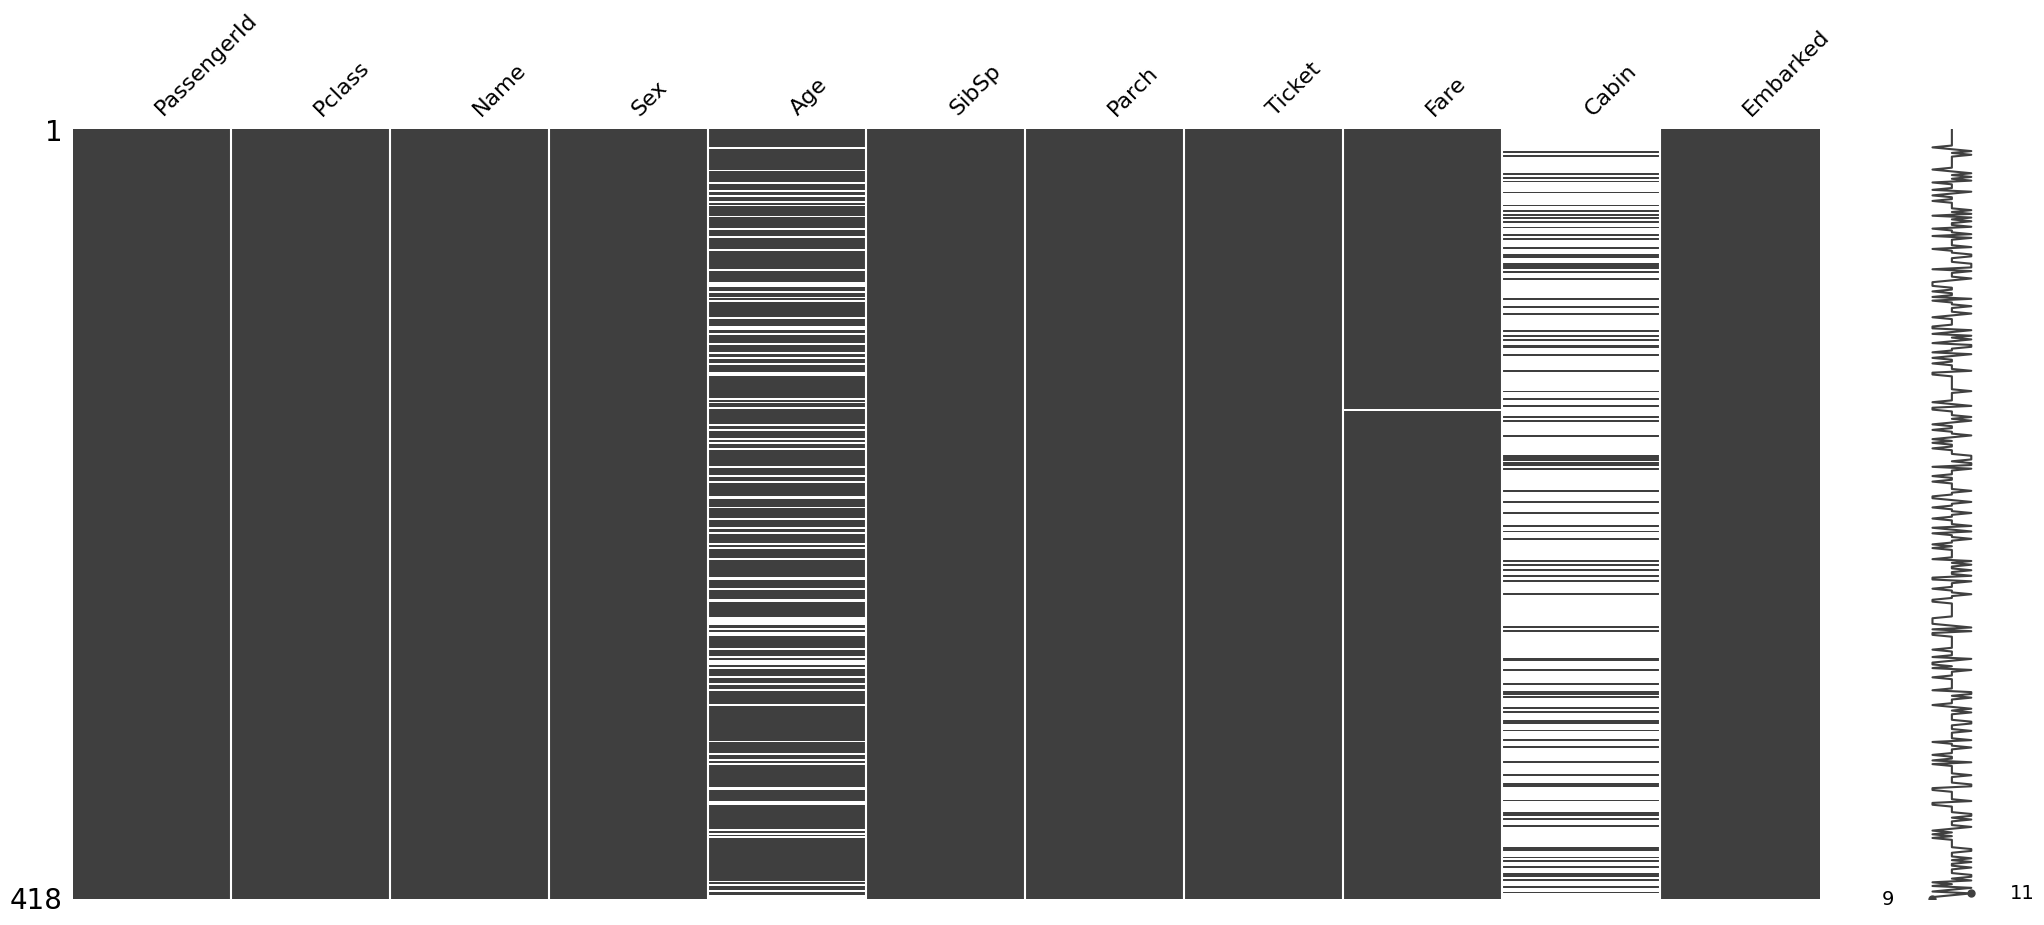

In [132]:
# Missing data in test set 

missingno.matrix(test)

In [133]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

In [135]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [136]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

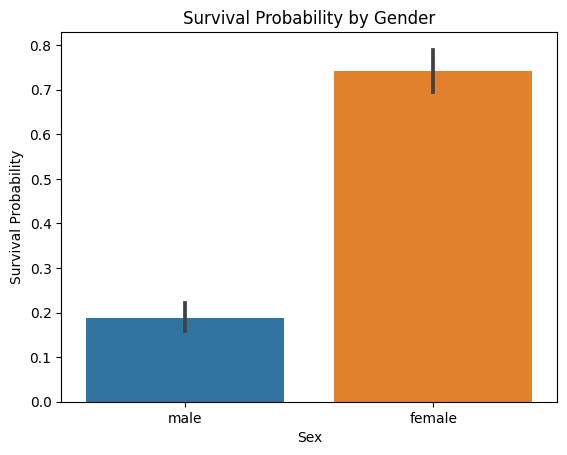

In [137]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

#  Female passengers are more likely to survive

## Categorical variable: Pclass

In [138]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [139]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

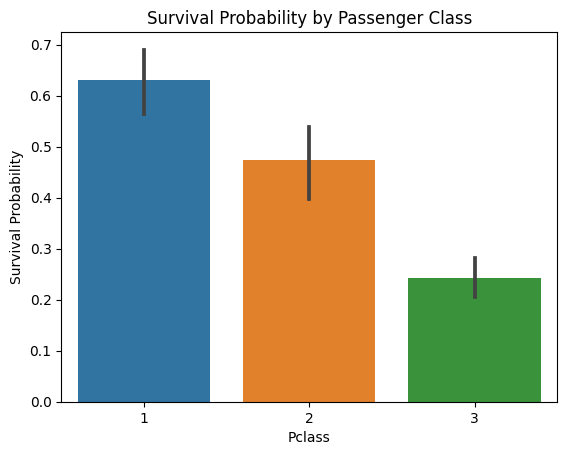

In [140]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

## Categorical variable: Embarked

In [141]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [142]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

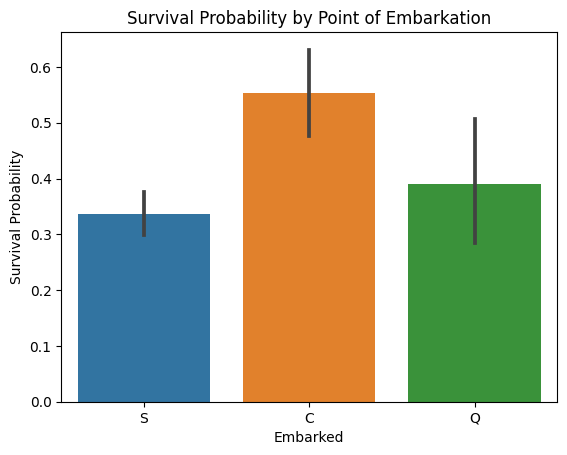

In [143]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

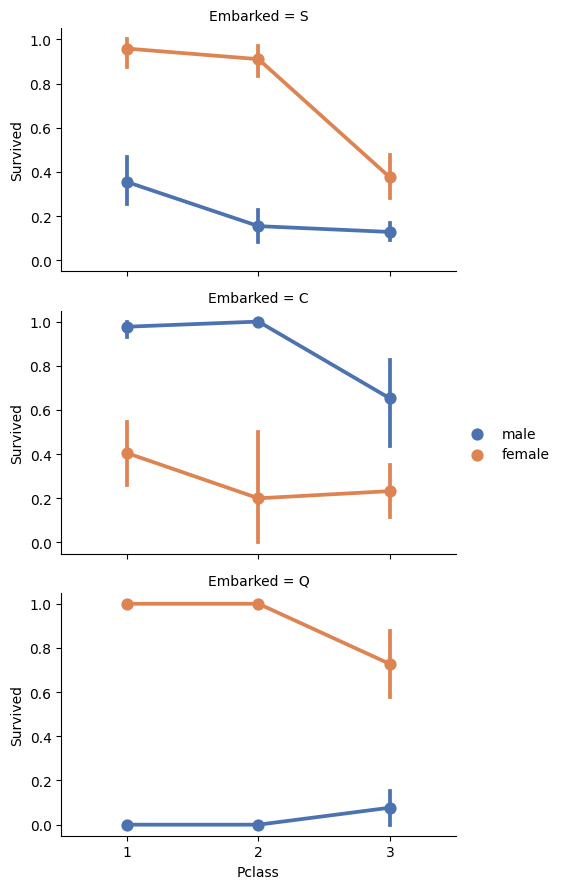

In [144]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked',  aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

## Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

## Detect and remove outliers in numerical variables

In [145]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [146]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [147]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


## Numerical variables correlation with survival

<Axes: >

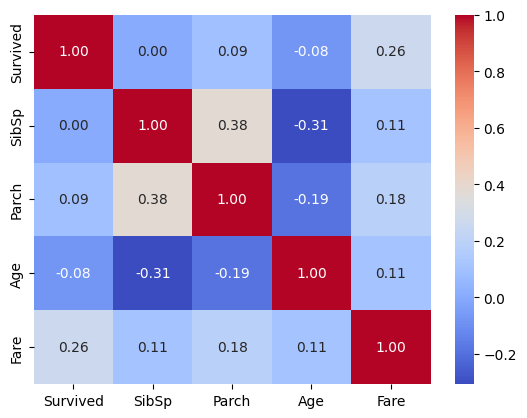

In [148]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Fare seems to be the only feature that has a substantial correlation with survival

## Numerical variable: SibSp

In [149]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [150]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

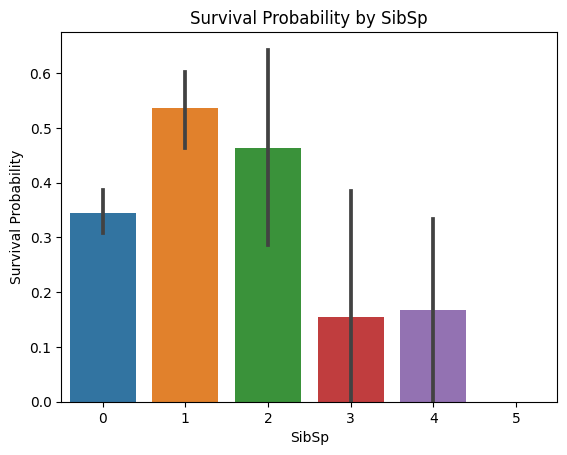

In [151]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical variable: Parch

In [152]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [153]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

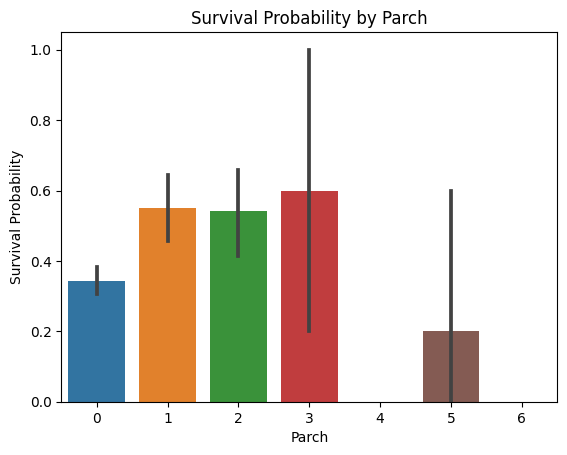

In [154]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical variable: Age

In [155]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

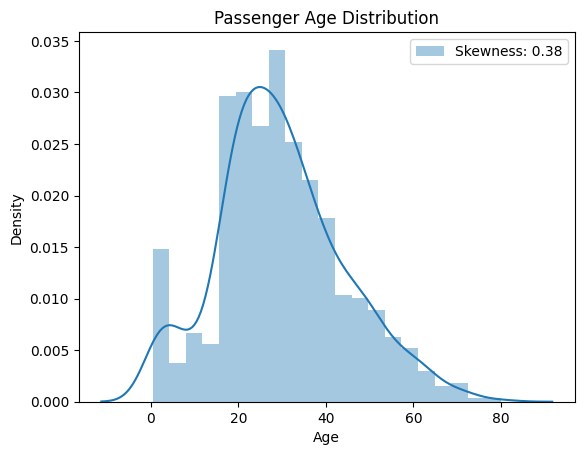

In [156]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

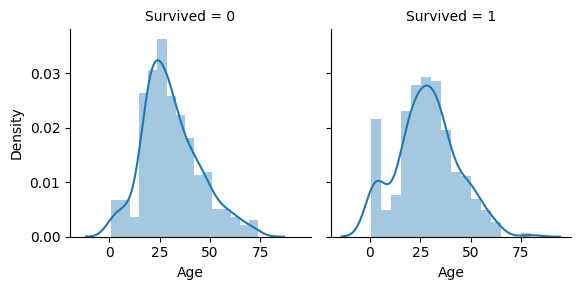

In [157]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

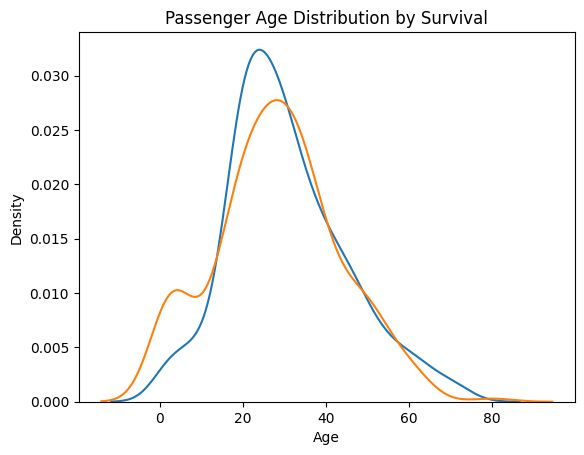

In [158]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Numerical variable: Fare

In [159]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

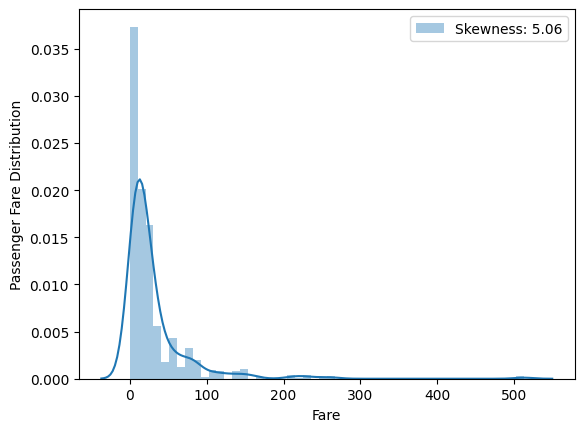

In [160]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## Drop and fill missing values

In [161]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [162]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [163]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [164]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [165]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [166]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [167]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [168]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [169]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [170]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

<Axes: >

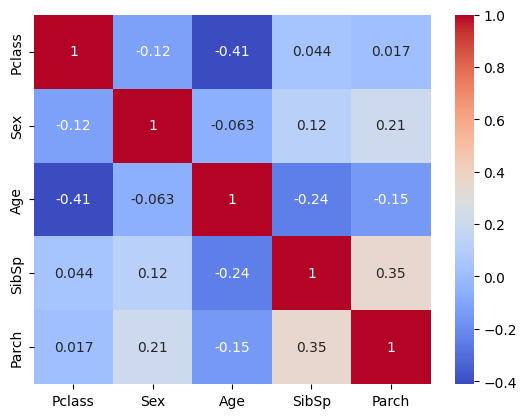

In [171]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [172]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [173]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [174]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

## Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

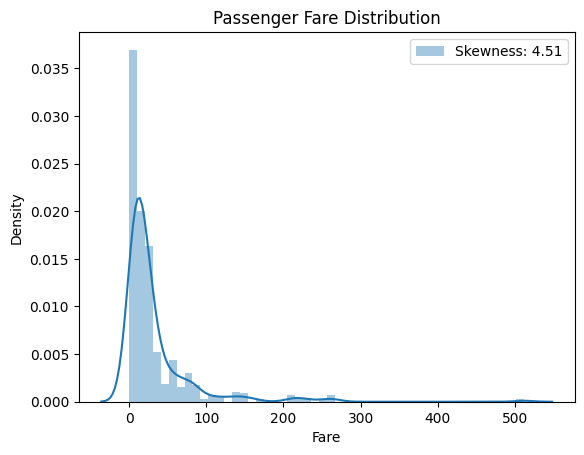

In [175]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [176]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

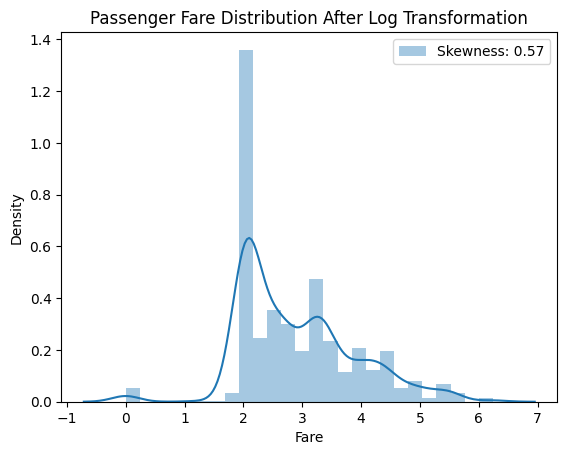

In [177]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## Feature engineering

In [178]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [179]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [180]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [181]:
# Number of unique Title

combine['Title'].nunique()

18

In [182]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [184]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


In [188]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [189]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [190]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [191]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [192]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## Age*Class

In [193]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [194]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [195]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [196]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [197]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [198]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [199]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [200]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [201]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [202]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [203]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [204]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [205]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [206]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [207]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [208]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [209]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [210]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [211]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [212]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## Fit model to data and make predictions

## Logistic regression

In [213]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

##  Support vector machines

In [214]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

## K-nearest neighbours (KNN)

In [215]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.56

## Gaussian naive bayes

In [216]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

## Perceptron

In [217]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

## Linear SVC

In [218]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

## Stochastic gradient descent

In [219]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.41

## Decision tree

In [220]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

## Random forest

In [221]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

## CatBoost

In [222]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 72.4ms	remaining: 1m 12s
1:	learn: 0.6798485	total: 75.7ms	remaining: 37.8s
2:	learn: 0.6729520	total: 79ms	remaining: 26.2s
3:	learn: 0.6669729	total: 82.1ms	remaining: 20.4s
4:	learn: 0.6607853	total: 85.3ms	remaining: 17s
5:	learn: 0.6554568	total: 88.5ms	remaining: 14.7s
6:	learn: 0.6500727	total: 91.7ms	remaining: 13s
7:	learn: 0.6437982	total: 93.8ms	remaining: 11.6s
8:	learn: 0.6398272	total: 95.3ms	remaining: 10.5s
9:	learn: 0.6351628	total: 97ms	remaining: 9.61s
10:	learn: 0.6305969	total: 98.2ms	remaining: 8.83s
11:	learn: 0.6252274	total: 99.6ms	remaining: 8.2s
12:	learn: 0.6203165	total: 101ms	remaining: 7.67s
13:	learn: 0.6163249	total: 102ms	remaining: 7.18s
14:	learn: 0.6126752	total: 103ms	remaining: 6.75s
15:	learn: 0.6078515	total: 104ms	remaining: 6.39s
16:	learn: 0.6033553	total: 105ms	remaining: 6.07s
17:	learn: 0.5984437	total: 106ms	remaining: 5.79s
18:	learn: 0.5935188	total: 107ms	remaining: 5.53s
19:	lear

394:	learn: 0.3598388	total: 336ms	remaining: 515ms
395:	learn: 0.3597675	total: 337ms	remaining: 513ms
396:	learn: 0.3596513	total: 337ms	remaining: 512ms
397:	learn: 0.3595207	total: 338ms	remaining: 511ms
398:	learn: 0.3594421	total: 338ms	remaining: 510ms
399:	learn: 0.3593734	total: 339ms	remaining: 508ms
400:	learn: 0.3592829	total: 340ms	remaining: 507ms
401:	learn: 0.3592270	total: 340ms	remaining: 506ms
402:	learn: 0.3591537	total: 341ms	remaining: 505ms
403:	learn: 0.3590753	total: 341ms	remaining: 504ms
404:	learn: 0.3590508	total: 342ms	remaining: 503ms
405:	learn: 0.3590162	total: 343ms	remaining: 501ms
406:	learn: 0.3590009	total: 343ms	remaining: 500ms
407:	learn: 0.3589156	total: 344ms	remaining: 499ms
408:	learn: 0.3588683	total: 344ms	remaining: 498ms
409:	learn: 0.3587823	total: 345ms	remaining: 496ms
410:	learn: 0.3587474	total: 346ms	remaining: 495ms
411:	learn: 0.3587482	total: 346ms	remaining: 494ms
412:	learn: 0.3586921	total: 347ms	remaining: 493ms
413:	learn: 

700:	learn: 0.3440922	total: 519ms	remaining: 222ms
701:	learn: 0.3440870	total: 520ms	remaining: 221ms
702:	learn: 0.3440379	total: 521ms	remaining: 220ms
703:	learn: 0.3439938	total: 521ms	remaining: 219ms
704:	learn: 0.3439472	total: 522ms	remaining: 218ms
705:	learn: 0.3439393	total: 523ms	remaining: 218ms
706:	learn: 0.3438692	total: 523ms	remaining: 217ms
707:	learn: 0.3438326	total: 524ms	remaining: 216ms
708:	learn: 0.3437895	total: 525ms	remaining: 215ms
709:	learn: 0.3437680	total: 525ms	remaining: 215ms
710:	learn: 0.3437548	total: 526ms	remaining: 214ms
711:	learn: 0.3437086	total: 527ms	remaining: 213ms
712:	learn: 0.3436499	total: 527ms	remaining: 212ms
713:	learn: 0.3436012	total: 528ms	remaining: 211ms
714:	learn: 0.3435448	total: 529ms	remaining: 211ms
715:	learn: 0.3434904	total: 529ms	remaining: 210ms
716:	learn: 0.3434540	total: 530ms	remaining: 209ms
717:	learn: 0.3433997	total: 531ms	remaining: 208ms
718:	learn: 0.3433745	total: 531ms	remaining: 208ms
719:	learn: 

978:	learn: 0.3334061	total: 702ms	remaining: 15.1ms
979:	learn: 0.3333743	total: 703ms	remaining: 14.4ms
980:	learn: 0.3333472	total: 704ms	remaining: 13.6ms
981:	learn: 0.3333265	total: 705ms	remaining: 12.9ms
982:	learn: 0.3333022	total: 705ms	remaining: 12.2ms
983:	learn: 0.3332792	total: 706ms	remaining: 11.5ms
984:	learn: 0.3332596	total: 707ms	remaining: 10.8ms
985:	learn: 0.3332502	total: 707ms	remaining: 10ms
986:	learn: 0.3332080	total: 708ms	remaining: 9.32ms
987:	learn: 0.3331780	total: 709ms	remaining: 8.61ms
988:	learn: 0.3331332	total: 709ms	remaining: 7.89ms
989:	learn: 0.3331055	total: 710ms	remaining: 7.17ms
990:	learn: 0.3330841	total: 710ms	remaining: 6.45ms
991:	learn: 0.3330485	total: 711ms	remaining: 5.73ms
992:	learn: 0.3330035	total: 712ms	remaining: 5.02ms
993:	learn: 0.3329715	total: 712ms	remaining: 4.3ms
994:	learn: 0.3329285	total: 713ms	remaining: 3.58ms
995:	learn: 0.3329040	total: 714ms	remaining: 2.87ms
996:	learn: 0.3328743	total: 714ms	remaining: 2.1

In [223]:
acc_catboost

85.7

## Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [224]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.56
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,77.41


## K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes.  

In [225]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [226]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 3.18ms	remaining: 3.17s
1:	learn: 0.6803102	total: 5.53ms	remaining: 2.76s
2:	learn: 0.6743326	total: 7.88ms	remaining: 2.62s
3:	learn: 0.6684760	total: 10.5ms	remaining: 2.62s
4:	learn: 0.6624557	total: 12.1ms	remaining: 2.41s
5:	learn: 0.6573314	total: 13.7ms	remaining: 2.28s
6:	learn: 0.6520748	total: 15.3ms	remaining: 2.17s
7:	learn: 0.6460856	total: 16.5ms	remaining: 2.05s
8:	learn: 0.6422711	total: 17.5ms	remaining: 1.93s
9:	learn: 0.6376840	total: 18.8ms	remaining: 1.86s
10:	learn: 0.6326541	total: 19.9ms	remaining: 1.79s
11:	learn: 0.6272334	total: 21ms	remaining: 1.73s
12:	learn: 0.6224744	total: 21.8ms	remaining: 1.66s
13:	learn: 0.6175199	total: 22.9ms	remaining: 1.61s
14:	learn: 0.6124417	total: 24ms	remaining: 1.57s
15:	learn: 0.6097890	total: 24.6ms	remaining: 1.51s
16:	learn: 0.6050558	total: 25.7ms	remaining: 1.49s
17:	learn: 0.6004952	total: 26.7ms	remaining: 1.46s
18:	learn: 0.5958639	total: 27.8ms	remaining: 1.

175:	learn: 0.3872753	total: 181ms	remaining: 849ms
176:	learn: 0.3869728	total: 183ms	remaining: 849ms
177:	learn: 0.3865807	total: 184ms	remaining: 847ms
178:	learn: 0.3863848	total: 184ms	remaining: 845ms
179:	learn: 0.3861438	total: 185ms	remaining: 845ms
180:	learn: 0.3859608	total: 187ms	remaining: 844ms
181:	learn: 0.3857118	total: 188ms	remaining: 843ms
182:	learn: 0.3854771	total: 189ms	remaining: 843ms
183:	learn: 0.3851276	total: 190ms	remaining: 842ms
184:	learn: 0.3847248	total: 191ms	remaining: 841ms
185:	learn: 0.3845056	total: 192ms	remaining: 839ms
186:	learn: 0.3841258	total: 193ms	remaining: 838ms
187:	learn: 0.3839180	total: 194ms	remaining: 837ms
188:	learn: 0.3837074	total: 195ms	remaining: 836ms
189:	learn: 0.3836852	total: 196ms	remaining: 834ms
190:	learn: 0.3832794	total: 197ms	remaining: 833ms
191:	learn: 0.3829478	total: 198ms	remaining: 832ms
192:	learn: 0.3826157	total: 199ms	remaining: 831ms
193:	learn: 0.3823455	total: 200ms	remaining: 830ms
194:	learn: 

356:	learn: 0.3582424	total: 366ms	remaining: 659ms
357:	learn: 0.3581233	total: 367ms	remaining: 658ms
358:	learn: 0.3580209	total: 368ms	remaining: 657ms
359:	learn: 0.3579075	total: 369ms	remaining: 656ms
360:	learn: 0.3577371	total: 370ms	remaining: 655ms
361:	learn: 0.3575759	total: 371ms	remaining: 654ms
362:	learn: 0.3574100	total: 372ms	remaining: 653ms
363:	learn: 0.3573566	total: 373ms	remaining: 652ms
364:	learn: 0.3573334	total: 374ms	remaining: 651ms
365:	learn: 0.3572311	total: 375ms	remaining: 650ms
366:	learn: 0.3571199	total: 376ms	remaining: 649ms
367:	learn: 0.3570880	total: 377ms	remaining: 648ms
368:	learn: 0.3569251	total: 378ms	remaining: 647ms
369:	learn: 0.3568497	total: 379ms	remaining: 646ms
370:	learn: 0.3567735	total: 380ms	remaining: 644ms
371:	learn: 0.3567326	total: 381ms	remaining: 643ms
372:	learn: 0.3566332	total: 382ms	remaining: 642ms
373:	learn: 0.3564693	total: 383ms	remaining: 641ms
374:	learn: 0.3563679	total: 384ms	remaining: 640ms
375:	learn: 

544:	learn: 0.3444803	total: 549ms	remaining: 458ms
545:	learn: 0.3444198	total: 550ms	remaining: 457ms
546:	learn: 0.3443678	total: 551ms	remaining: 456ms
547:	learn: 0.3443029	total: 552ms	remaining: 455ms
548:	learn: 0.3442957	total: 552ms	remaining: 454ms
549:	learn: 0.3442495	total: 553ms	remaining: 453ms
550:	learn: 0.3441675	total: 554ms	remaining: 451ms
551:	learn: 0.3440932	total: 555ms	remaining: 450ms
552:	learn: 0.3440398	total: 556ms	remaining: 449ms
553:	learn: 0.3439665	total: 556ms	remaining: 448ms
554:	learn: 0.3438358	total: 557ms	remaining: 447ms
555:	learn: 0.3438297	total: 558ms	remaining: 445ms
556:	learn: 0.3438278	total: 558ms	remaining: 444ms
557:	learn: 0.3437445	total: 559ms	remaining: 442ms
558:	learn: 0.3437039	total: 559ms	remaining: 441ms
559:	learn: 0.3436563	total: 560ms	remaining: 440ms
560:	learn: 0.3436320	total: 560ms	remaining: 439ms
561:	learn: 0.3435094	total: 561ms	remaining: 437ms
562:	learn: 0.3434800	total: 562ms	remaining: 436ms
563:	learn: 

742:	learn: 0.3350508	total: 737ms	remaining: 255ms
743:	learn: 0.3349968	total: 739ms	remaining: 254ms
744:	learn: 0.3349490	total: 741ms	remaining: 254ms
745:	learn: 0.3348667	total: 742ms	remaining: 253ms
746:	learn: 0.3347958	total: 743ms	remaining: 252ms
747:	learn: 0.3347202	total: 744ms	remaining: 251ms
748:	learn: 0.3346524	total: 745ms	remaining: 250ms
749:	learn: 0.3345535	total: 746ms	remaining: 249ms
750:	learn: 0.3344783	total: 747ms	remaining: 248ms
751:	learn: 0.3344660	total: 748ms	remaining: 247ms
752:	learn: 0.3344267	total: 749ms	remaining: 246ms
753:	learn: 0.3343797	total: 749ms	remaining: 245ms
754:	learn: 0.3343070	total: 750ms	remaining: 244ms
755:	learn: 0.3342755	total: 752ms	remaining: 243ms
756:	learn: 0.3342259	total: 753ms	remaining: 242ms
757:	learn: 0.3342075	total: 753ms	remaining: 241ms
758:	learn: 0.3341301	total: 754ms	remaining: 240ms
759:	learn: 0.3341158	total: 755ms	remaining: 238ms
760:	learn: 0.3340972	total: 756ms	remaining: 237ms
761:	learn: 

916:	learn: 0.3270725	total: 921ms	remaining: 83.3ms
917:	learn: 0.3270089	total: 922ms	remaining: 82.4ms
918:	learn: 0.3269784	total: 923ms	remaining: 81.4ms
919:	learn: 0.3269523	total: 926ms	remaining: 80.5ms
920:	learn: 0.3269135	total: 927ms	remaining: 79.5ms
921:	learn: 0.3268438	total: 928ms	remaining: 78.5ms
922:	learn: 0.3267925	total: 929ms	remaining: 77.5ms
923:	learn: 0.3267579	total: 930ms	remaining: 76.5ms
924:	learn: 0.3267549	total: 931ms	remaining: 75.5ms
925:	learn: 0.3267257	total: 932ms	remaining: 74.5ms
926:	learn: 0.3266700	total: 933ms	remaining: 73.4ms
927:	learn: 0.3266278	total: 934ms	remaining: 72.4ms
928:	learn: 0.3265920	total: 935ms	remaining: 71.4ms
929:	learn: 0.3265699	total: 936ms	remaining: 70.4ms
930:	learn: 0.3265288	total: 937ms	remaining: 69.4ms
931:	learn: 0.3264957	total: 938ms	remaining: 68.4ms
932:	learn: 0.3264573	total: 939ms	remaining: 67.5ms
933:	learn: 0.3263963	total: 941ms	remaining: 66.5ms
934:	learn: 0.3263416	total: 942ms	remaining: 

131:	learn: 0.4098416	total: 182ms	remaining: 1.2s
132:	learn: 0.4090809	total: 184ms	remaining: 1.2s
133:	learn: 0.4085814	total: 185ms	remaining: 1.19s
134:	learn: 0.4079615	total: 186ms	remaining: 1.19s
135:	learn: 0.4076426	total: 187ms	remaining: 1.19s
136:	learn: 0.4069353	total: 188ms	remaining: 1.18s
137:	learn: 0.4066160	total: 188ms	remaining: 1.18s
138:	learn: 0.4059478	total: 189ms	remaining: 1.17s
139:	learn: 0.4054505	total: 190ms	remaining: 1.17s
140:	learn: 0.4051871	total: 191ms	remaining: 1.16s
141:	learn: 0.4048093	total: 192ms	remaining: 1.16s
142:	learn: 0.4046345	total: 193ms	remaining: 1.15s
143:	learn: 0.4045361	total: 193ms	remaining: 1.15s
144:	learn: 0.4039383	total: 194ms	remaining: 1.14s
145:	learn: 0.4036358	total: 195ms	remaining: 1.14s
146:	learn: 0.4029941	total: 196ms	remaining: 1.14s
147:	learn: 0.4026349	total: 197ms	remaining: 1.13s
148:	learn: 0.4022900	total: 198ms	remaining: 1.13s
149:	learn: 0.4017023	total: 199ms	remaining: 1.13s
150:	learn: 0.

322:	learn: 0.3676511	total: 367ms	remaining: 770ms
323:	learn: 0.3675711	total: 368ms	remaining: 768ms
324:	learn: 0.3674850	total: 369ms	remaining: 767ms
325:	learn: 0.3673866	total: 370ms	remaining: 766ms
326:	learn: 0.3673135	total: 371ms	remaining: 764ms
327:	learn: 0.3672202	total: 373ms	remaining: 763ms
328:	learn: 0.3671789	total: 373ms	remaining: 762ms
329:	learn: 0.3670307	total: 374ms	remaining: 760ms
330:	learn: 0.3669939	total: 375ms	remaining: 758ms
331:	learn: 0.3668257	total: 376ms	remaining: 757ms
332:	learn: 0.3666778	total: 378ms	remaining: 757ms
333:	learn: 0.3666293	total: 379ms	remaining: 756ms
334:	learn: 0.3664950	total: 380ms	remaining: 755ms
335:	learn: 0.3664381	total: 381ms	remaining: 753ms
336:	learn: 0.3663014	total: 382ms	remaining: 752ms
337:	learn: 0.3661585	total: 383ms	remaining: 751ms
338:	learn: 0.3660450	total: 384ms	remaining: 750ms
339:	learn: 0.3659201	total: 385ms	remaining: 748ms
340:	learn: 0.3657251	total: 386ms	remaining: 747ms
341:	learn: 

510:	learn: 0.3528614	total: 551ms	remaining: 528ms
511:	learn: 0.3527917	total: 552ms	remaining: 527ms
512:	learn: 0.3527338	total: 554ms	remaining: 525ms
513:	learn: 0.3526892	total: 554ms	remaining: 524ms
514:	learn: 0.3526157	total: 555ms	remaining: 523ms
515:	learn: 0.3525415	total: 556ms	remaining: 521ms
516:	learn: 0.3524770	total: 556ms	remaining: 520ms
517:	learn: 0.3524535	total: 557ms	remaining: 518ms
518:	learn: 0.3523723	total: 558ms	remaining: 517ms
519:	learn: 0.3523433	total: 558ms	remaining: 515ms
520:	learn: 0.3523031	total: 559ms	remaining: 514ms
521:	learn: 0.3522650	total: 560ms	remaining: 512ms
522:	learn: 0.3522409	total: 560ms	remaining: 511ms
523:	learn: 0.3521702	total: 561ms	remaining: 510ms
524:	learn: 0.3520891	total: 562ms	remaining: 509ms
525:	learn: 0.3520603	total: 563ms	remaining: 508ms
526:	learn: 0.3520136	total: 564ms	remaining: 507ms
527:	learn: 0.3519952	total: 565ms	remaining: 505ms
528:	learn: 0.3519494	total: 566ms	remaining: 504ms
529:	learn: 

701:	learn: 0.3430735	total: 734ms	remaining: 312ms
702:	learn: 0.3430641	total: 735ms	remaining: 310ms
703:	learn: 0.3430259	total: 736ms	remaining: 309ms
704:	learn: 0.3429762	total: 737ms	remaining: 308ms
705:	learn: 0.3429312	total: 738ms	remaining: 307ms
706:	learn: 0.3429302	total: 739ms	remaining: 306ms
707:	learn: 0.3428564	total: 740ms	remaining: 305ms
708:	learn: 0.3428238	total: 741ms	remaining: 304ms
709:	learn: 0.3427898	total: 742ms	remaining: 303ms
710:	learn: 0.3427253	total: 743ms	remaining: 302ms
711:	learn: 0.3426920	total: 744ms	remaining: 301ms
712:	learn: 0.3426390	total: 745ms	remaining: 300ms
713:	learn: 0.3425902	total: 746ms	remaining: 299ms
714:	learn: 0.3425390	total: 747ms	remaining: 298ms
715:	learn: 0.3424881	total: 748ms	remaining: 297ms
716:	learn: 0.3424465	total: 749ms	remaining: 296ms
717:	learn: 0.3424047	total: 750ms	remaining: 295ms
718:	learn: 0.3423381	total: 751ms	remaining: 294ms
719:	learn: 0.3422669	total: 752ms	remaining: 293ms
720:	learn: 

883:	learn: 0.3352016	total: 917ms	remaining: 120ms
884:	learn: 0.3351398	total: 918ms	remaining: 119ms
885:	learn: 0.3351170	total: 920ms	remaining: 118ms
886:	learn: 0.3350928	total: 921ms	remaining: 117ms
887:	learn: 0.3350446	total: 922ms	remaining: 116ms
888:	learn: 0.3349822	total: 923ms	remaining: 115ms
889:	learn: 0.3349350	total: 924ms	remaining: 114ms
890:	learn: 0.3348872	total: 925ms	remaining: 113ms
891:	learn: 0.3348358	total: 926ms	remaining: 112ms
892:	learn: 0.3348079	total: 927ms	remaining: 111ms
893:	learn: 0.3347509	total: 928ms	remaining: 110ms
894:	learn: 0.3347509	total: 928ms	remaining: 109ms
895:	learn: 0.3346960	total: 929ms	remaining: 108ms
896:	learn: 0.3346765	total: 930ms	remaining: 107ms
897:	learn: 0.3346130	total: 931ms	remaining: 106ms
898:	learn: 0.3345768	total: 932ms	remaining: 105ms
899:	learn: 0.3345452	total: 933ms	remaining: 104ms
900:	learn: 0.3345173	total: 934ms	remaining: 103ms
901:	learn: 0.3344875	total: 935ms	remaining: 102ms
902:	learn: 

118:	learn: 0.3982674	total: 183ms	remaining: 1.35s
119:	learn: 0.3976391	total: 184ms	remaining: 1.35s
120:	learn: 0.3969441	total: 185ms	remaining: 1.34s
121:	learn: 0.3960321	total: 186ms	remaining: 1.34s
122:	learn: 0.3950744	total: 187ms	remaining: 1.33s
123:	learn: 0.3944103	total: 188ms	remaining: 1.33s
124:	learn: 0.3938233	total: 189ms	remaining: 1.32s
125:	learn: 0.3929872	total: 190ms	remaining: 1.32s
126:	learn: 0.3921231	total: 191ms	remaining: 1.31s
127:	learn: 0.3916329	total: 192ms	remaining: 1.31s
128:	learn: 0.3912404	total: 193ms	remaining: 1.3s
129:	learn: 0.3907579	total: 194ms	remaining: 1.3s
130:	learn: 0.3904153	total: 195ms	remaining: 1.29s
131:	learn: 0.3896216	total: 196ms	remaining: 1.29s
132:	learn: 0.3890522	total: 197ms	remaining: 1.28s
133:	learn: 0.3886394	total: 198ms	remaining: 1.28s
134:	learn: 0.3878328	total: 199ms	remaining: 1.28s
135:	learn: 0.3873657	total: 200ms	remaining: 1.27s
136:	learn: 0.3868193	total: 201ms	remaining: 1.27s
137:	learn: 0.

302:	learn: 0.3481555	total: 367ms	remaining: 844ms
303:	learn: 0.3480384	total: 368ms	remaining: 843ms
304:	learn: 0.3479585	total: 369ms	remaining: 841ms
305:	learn: 0.3477341	total: 371ms	remaining: 842ms
306:	learn: 0.3476522	total: 372ms	remaining: 840ms
307:	learn: 0.3475402	total: 373ms	remaining: 839ms
308:	learn: 0.3473733	total: 374ms	remaining: 837ms
309:	learn: 0.3472884	total: 375ms	remaining: 835ms
310:	learn: 0.3471860	total: 376ms	remaining: 834ms
311:	learn: 0.3471409	total: 377ms	remaining: 832ms
312:	learn: 0.3469741	total: 378ms	remaining: 830ms
313:	learn: 0.3467120	total: 379ms	remaining: 829ms
314:	learn: 0.3466240	total: 380ms	remaining: 827ms
315:	learn: 0.3465507	total: 381ms	remaining: 826ms
316:	learn: 0.3464063	total: 382ms	remaining: 824ms
317:	learn: 0.3463112	total: 383ms	remaining: 822ms
318:	learn: 0.3462499	total: 384ms	remaining: 821ms
319:	learn: 0.3461178	total: 385ms	remaining: 819ms
320:	learn: 0.3460191	total: 386ms	remaining: 817ms
321:	learn: 

493:	learn: 0.3327575	total: 552ms	remaining: 566ms
494:	learn: 0.3327065	total: 553ms	remaining: 565ms
495:	learn: 0.3326136	total: 554ms	remaining: 563ms
496:	learn: 0.3326032	total: 555ms	remaining: 562ms
497:	learn: 0.3325845	total: 556ms	remaining: 561ms
498:	learn: 0.3325488	total: 557ms	remaining: 559ms
499:	learn: 0.3325433	total: 558ms	remaining: 558ms
500:	learn: 0.3325170	total: 559ms	remaining: 557ms
501:	learn: 0.3324630	total: 560ms	remaining: 555ms
502:	learn: 0.3323831	total: 561ms	remaining: 554ms
503:	learn: 0.3323758	total: 562ms	remaining: 553ms
504:	learn: 0.3323022	total: 563ms	remaining: 552ms
505:	learn: 0.3321883	total: 564ms	remaining: 550ms
506:	learn: 0.3321060	total: 565ms	remaining: 549ms
507:	learn: 0.3320799	total: 566ms	remaining: 548ms
508:	learn: 0.3320005	total: 567ms	remaining: 547ms
509:	learn: 0.3319748	total: 568ms	remaining: 545ms
510:	learn: 0.3319397	total: 569ms	remaining: 544ms
511:	learn: 0.3319389	total: 569ms	remaining: 543ms
512:	learn: 

674:	learn: 0.3233410	total: 737ms	remaining: 355ms
675:	learn: 0.3232929	total: 738ms	remaining: 354ms
676:	learn: 0.3232707	total: 739ms	remaining: 353ms
677:	learn: 0.3232428	total: 740ms	remaining: 352ms
678:	learn: 0.3232097	total: 741ms	remaining: 351ms
679:	learn: 0.3231623	total: 742ms	remaining: 349ms
680:	learn: 0.3230845	total: 743ms	remaining: 348ms
681:	learn: 0.3230837	total: 744ms	remaining: 347ms
682:	learn: 0.3230371	total: 745ms	remaining: 346ms
683:	learn: 0.3229962	total: 746ms	remaining: 345ms
684:	learn: 0.3228946	total: 747ms	remaining: 344ms
685:	learn: 0.3228731	total: 748ms	remaining: 342ms
686:	learn: 0.3228361	total: 749ms	remaining: 341ms
687:	learn: 0.3227090	total: 750ms	remaining: 340ms
688:	learn: 0.3226548	total: 751ms	remaining: 339ms
689:	learn: 0.3226548	total: 752ms	remaining: 338ms
690:	learn: 0.3226388	total: 753ms	remaining: 337ms
691:	learn: 0.3226162	total: 754ms	remaining: 336ms
692:	learn: 0.3225976	total: 755ms	remaining: 334ms
693:	learn: 

862:	learn: 0.3154491	total: 922ms	remaining: 146ms
863:	learn: 0.3154208	total: 923ms	remaining: 145ms
864:	learn: 0.3153597	total: 924ms	remaining: 144ms
865:	learn: 0.3153358	total: 925ms	remaining: 143ms
866:	learn: 0.3153036	total: 926ms	remaining: 142ms
867:	learn: 0.3152546	total: 927ms	remaining: 141ms
868:	learn: 0.3151838	total: 928ms	remaining: 140ms
869:	learn: 0.3151391	total: 929ms	remaining: 139ms
870:	learn: 0.3151084	total: 930ms	remaining: 138ms
871:	learn: 0.3150372	total: 931ms	remaining: 137ms
872:	learn: 0.3150073	total: 932ms	remaining: 136ms
873:	learn: 0.3149642	total: 933ms	remaining: 134ms
874:	learn: 0.3149339	total: 934ms	remaining: 133ms
875:	learn: 0.3149009	total: 935ms	remaining: 132ms
876:	learn: 0.3148733	total: 936ms	remaining: 131ms
877:	learn: 0.3148120	total: 937ms	remaining: 130ms
878:	learn: 0.3147605	total: 938ms	remaining: 129ms
879:	learn: 0.3147337	total: 938ms	remaining: 128ms
880:	learn: 0.3147003	total: 939ms	remaining: 127ms
881:	learn: 

124:	learn: 0.4162387	total: 183ms	remaining: 1.28s
125:	learn: 0.4155236	total: 184ms	remaining: 1.28s
126:	learn: 0.4147755	total: 185ms	remaining: 1.27s
127:	learn: 0.4140718	total: 186ms	remaining: 1.27s
128:	learn: 0.4135743	total: 187ms	remaining: 1.26s
129:	learn: 0.4129753	total: 188ms	remaining: 1.26s
130:	learn: 0.4121860	total: 189ms	remaining: 1.25s
131:	learn: 0.4117472	total: 190ms	remaining: 1.25s
132:	learn: 0.4110763	total: 191ms	remaining: 1.24s
133:	learn: 0.4104114	total: 192ms	remaining: 1.24s
134:	learn: 0.4096529	total: 193ms	remaining: 1.23s
135:	learn: 0.4089339	total: 194ms	remaining: 1.23s
136:	learn: 0.4084606	total: 195ms	remaining: 1.23s
137:	learn: 0.4078872	total: 196ms	remaining: 1.22s
138:	learn: 0.4075407	total: 197ms	remaining: 1.22s
139:	learn: 0.4069905	total: 198ms	remaining: 1.22s
140:	learn: 0.4064906	total: 199ms	remaining: 1.21s
141:	learn: 0.4059240	total: 200ms	remaining: 1.21s
142:	learn: 0.4052982	total: 201ms	remaining: 1.21s
143:	learn: 

315:	learn: 0.3696839	total: 367ms	remaining: 793ms
316:	learn: 0.3695457	total: 368ms	remaining: 792ms
317:	learn: 0.3693976	total: 369ms	remaining: 791ms
318:	learn: 0.3693045	total: 370ms	remaining: 790ms
319:	learn: 0.3691480	total: 371ms	remaining: 788ms
320:	learn: 0.3690486	total: 372ms	remaining: 787ms
321:	learn: 0.3689054	total: 373ms	remaining: 786ms
322:	learn: 0.3688237	total: 374ms	remaining: 784ms
323:	learn: 0.3687316	total: 375ms	remaining: 783ms
324:	learn: 0.3685716	total: 376ms	remaining: 781ms
325:	learn: 0.3685638	total: 377ms	remaining: 779ms
326:	learn: 0.3684900	total: 378ms	remaining: 778ms
327:	learn: 0.3684401	total: 379ms	remaining: 776ms
328:	learn: 0.3682300	total: 380ms	remaining: 775ms
329:	learn: 0.3682009	total: 381ms	remaining: 773ms
330:	learn: 0.3681386	total: 382ms	remaining: 771ms
331:	learn: 0.3680053	total: 383ms	remaining: 770ms
332:	learn: 0.3680021	total: 383ms	remaining: 768ms
333:	learn: 0.3679353	total: 384ms	remaining: 766ms
334:	learn: 

508:	learn: 0.3550553	total: 552ms	remaining: 533ms
509:	learn: 0.3549395	total: 553ms	remaining: 532ms
510:	learn: 0.3549382	total: 554ms	remaining: 530ms
511:	learn: 0.3548248	total: 555ms	remaining: 529ms
512:	learn: 0.3547348	total: 556ms	remaining: 528ms
513:	learn: 0.3546677	total: 557ms	remaining: 527ms
514:	learn: 0.3546055	total: 558ms	remaining: 526ms
515:	learn: 0.3545026	total: 559ms	remaining: 524ms
516:	learn: 0.3543902	total: 560ms	remaining: 523ms
517:	learn: 0.3543645	total: 561ms	remaining: 522ms
518:	learn: 0.3542904	total: 562ms	remaining: 521ms
519:	learn: 0.3542389	total: 563ms	remaining: 519ms
520:	learn: 0.3541824	total: 563ms	remaining: 518ms
521:	learn: 0.3541516	total: 564ms	remaining: 517ms
522:	learn: 0.3540657	total: 565ms	remaining: 515ms
523:	learn: 0.3539731	total: 566ms	remaining: 514ms
524:	learn: 0.3539562	total: 567ms	remaining: 513ms
525:	learn: 0.3539353	total: 568ms	remaining: 512ms
526:	learn: 0.3538338	total: 569ms	remaining: 511ms
527:	learn: 

700:	learn: 0.3451806	total: 737ms	remaining: 314ms
701:	learn: 0.3451467	total: 738ms	remaining: 313ms
702:	learn: 0.3451109	total: 739ms	remaining: 312ms
703:	learn: 0.3450546	total: 740ms	remaining: 311ms
704:	learn: 0.3449976	total: 741ms	remaining: 310ms
705:	learn: 0.3449590	total: 742ms	remaining: 309ms
706:	learn: 0.3449014	total: 743ms	remaining: 308ms
707:	learn: 0.3448532	total: 744ms	remaining: 307ms
708:	learn: 0.3448333	total: 745ms	remaining: 306ms
709:	learn: 0.3447881	total: 746ms	remaining: 305ms
710:	learn: 0.3446965	total: 747ms	remaining: 304ms
711:	learn: 0.3446628	total: 748ms	remaining: 303ms
712:	learn: 0.3446141	total: 749ms	remaining: 301ms
713:	learn: 0.3446119	total: 750ms	remaining: 300ms
714:	learn: 0.3445772	total: 751ms	remaining: 299ms
715:	learn: 0.3445248	total: 752ms	remaining: 298ms
716:	learn: 0.3444822	total: 753ms	remaining: 297ms
717:	learn: 0.3444271	total: 754ms	remaining: 296ms
718:	learn: 0.3443878	total: 755ms	remaining: 295ms
719:	learn: 

887:	learn: 0.3371363	total: 921ms	remaining: 116ms
888:	learn: 0.3371070	total: 923ms	remaining: 115ms
889:	learn: 0.3370535	total: 924ms	remaining: 114ms
890:	learn: 0.3369993	total: 925ms	remaining: 113ms
891:	learn: 0.3369699	total: 926ms	remaining: 112ms
892:	learn: 0.3369248	total: 927ms	remaining: 111ms
893:	learn: 0.3368855	total: 929ms	remaining: 110ms
894:	learn: 0.3368294	total: 930ms	remaining: 109ms
895:	learn: 0.3367826	total: 931ms	remaining: 108ms
896:	learn: 0.3367571	total: 933ms	remaining: 107ms
897:	learn: 0.3367234	total: 934ms	remaining: 106ms
898:	learn: 0.3366884	total: 935ms	remaining: 105ms
899:	learn: 0.3366379	total: 937ms	remaining: 104ms
900:	learn: 0.3366276	total: 939ms	remaining: 103ms
901:	learn: 0.3365959	total: 940ms	remaining: 102ms
902:	learn: 0.3365673	total: 941ms	remaining: 101ms
903:	learn: 0.3365208	total: 942ms	remaining: 100ms
904:	learn: 0.3364759	total: 943ms	remaining: 99ms
905:	learn: 0.3364456	total: 944ms	remaining: 97.9ms
906:	learn: 

178:	learn: 0.3935065	total: 185ms	remaining: 849ms
179:	learn: 0.3931065	total: 188ms	remaining: 855ms
180:	learn: 0.3929181	total: 189ms	remaining: 854ms
181:	learn: 0.3925811	total: 190ms	remaining: 853ms
182:	learn: 0.3923091	total: 191ms	remaining: 852ms
183:	learn: 0.3921974	total: 192ms	remaining: 851ms
184:	learn: 0.3919525	total: 193ms	remaining: 850ms
185:	learn: 0.3919342	total: 194ms	remaining: 847ms
186:	learn: 0.3915884	total: 195ms	remaining: 846ms
187:	learn: 0.3913062	total: 196ms	remaining: 845ms
188:	learn: 0.3910114	total: 197ms	remaining: 844ms
189:	learn: 0.3907526	total: 198ms	remaining: 843ms
190:	learn: 0.3904710	total: 199ms	remaining: 842ms
191:	learn: 0.3901599	total: 200ms	remaining: 841ms
192:	learn: 0.3897854	total: 201ms	remaining: 840ms
193:	learn: 0.3895898	total: 202ms	remaining: 839ms
194:	learn: 0.3894752	total: 203ms	remaining: 837ms
195:	learn: 0.3892214	total: 204ms	remaining: 836ms
196:	learn: 0.3889552	total: 205ms	remaining: 835ms
197:	learn: 

369:	learn: 0.3648047	total: 371ms	remaining: 631ms
370:	learn: 0.3646705	total: 372ms	remaining: 631ms
371:	learn: 0.3646118	total: 373ms	remaining: 630ms
372:	learn: 0.3644768	total: 374ms	remaining: 629ms
373:	learn: 0.3644040	total: 375ms	remaining: 628ms
374:	learn: 0.3643752	total: 376ms	remaining: 627ms
375:	learn: 0.3642621	total: 377ms	remaining: 626ms
376:	learn: 0.3641619	total: 378ms	remaining: 625ms
377:	learn: 0.3641165	total: 379ms	remaining: 624ms
378:	learn: 0.3640162	total: 380ms	remaining: 623ms
379:	learn: 0.3640057	total: 381ms	remaining: 621ms
380:	learn: 0.3639249	total: 382ms	remaining: 621ms
381:	learn: 0.3638230	total: 383ms	remaining: 619ms
382:	learn: 0.3637287	total: 384ms	remaining: 618ms
383:	learn: 0.3635981	total: 385ms	remaining: 617ms
384:	learn: 0.3634993	total: 386ms	remaining: 617ms
385:	learn: 0.3634445	total: 387ms	remaining: 616ms
386:	learn: 0.3633478	total: 388ms	remaining: 615ms
387:	learn: 0.3632655	total: 389ms	remaining: 614ms
388:	learn: 

558:	learn: 0.3523004	total: 556ms	remaining: 439ms
559:	learn: 0.3522383	total: 557ms	remaining: 438ms
560:	learn: 0.3522376	total: 558ms	remaining: 437ms
561:	learn: 0.3521885	total: 559ms	remaining: 436ms
562:	learn: 0.3521270	total: 560ms	remaining: 435ms
563:	learn: 0.3520559	total: 561ms	remaining: 434ms
564:	learn: 0.3519951	total: 562ms	remaining: 433ms
565:	learn: 0.3519312	total: 563ms	remaining: 432ms
566:	learn: 0.3518741	total: 564ms	remaining: 431ms
567:	learn: 0.3517856	total: 565ms	remaining: 430ms
568:	learn: 0.3517078	total: 566ms	remaining: 429ms
569:	learn: 0.3516584	total: 567ms	remaining: 428ms
570:	learn: 0.3515843	total: 568ms	remaining: 427ms
571:	learn: 0.3515165	total: 569ms	remaining: 426ms
572:	learn: 0.3514544	total: 570ms	remaining: 425ms
573:	learn: 0.3513990	total: 571ms	remaining: 424ms
574:	learn: 0.3513210	total: 572ms	remaining: 423ms
575:	learn: 0.3512603	total: 573ms	remaining: 422ms
576:	learn: 0.3512559	total: 574ms	remaining: 421ms
577:	learn: 

748:	learn: 0.3433439	total: 742ms	remaining: 249ms
749:	learn: 0.3432841	total: 743ms	remaining: 248ms
750:	learn: 0.3432382	total: 744ms	remaining: 247ms
751:	learn: 0.3431708	total: 746ms	remaining: 246ms
752:	learn: 0.3431531	total: 747ms	remaining: 245ms
753:	learn: 0.3431345	total: 748ms	remaining: 244ms
754:	learn: 0.3430619	total: 749ms	remaining: 243ms
755:	learn: 0.3430165	total: 750ms	remaining: 242ms
756:	learn: 0.3429497	total: 751ms	remaining: 241ms
757:	learn: 0.3428996	total: 752ms	remaining: 240ms
758:	learn: 0.3428748	total: 753ms	remaining: 239ms
759:	learn: 0.3428711	total: 753ms	remaining: 238ms
760:	learn: 0.3428462	total: 754ms	remaining: 237ms
761:	learn: 0.3427963	total: 756ms	remaining: 236ms
762:	learn: 0.3427761	total: 756ms	remaining: 235ms
763:	learn: 0.3427293	total: 758ms	remaining: 234ms
764:	learn: 0.3426912	total: 759ms	remaining: 233ms
765:	learn: 0.3426456	total: 760ms	remaining: 232ms
766:	learn: 0.3426147	total: 761ms	remaining: 231ms
767:	learn: 

935:	learn: 0.3360065	total: 928ms	remaining: 63.4ms
936:	learn: 0.3359795	total: 929ms	remaining: 62.5ms
937:	learn: 0.3359469	total: 930ms	remaining: 61.5ms
938:	learn: 0.3358989	total: 931ms	remaining: 60.5ms
939:	learn: 0.3358546	total: 932ms	remaining: 59.5ms
940:	learn: 0.3358297	total: 933ms	remaining: 58.5ms
941:	learn: 0.3357783	total: 934ms	remaining: 57.5ms
942:	learn: 0.3357337	total: 935ms	remaining: 56.5ms
943:	learn: 0.3356924	total: 936ms	remaining: 55.5ms
944:	learn: 0.3356553	total: 937ms	remaining: 54.5ms
945:	learn: 0.3355975	total: 938ms	remaining: 53.5ms
946:	learn: 0.3355569	total: 939ms	remaining: 52.5ms
947:	learn: 0.3355181	total: 940ms	remaining: 51.5ms
948:	learn: 0.3354658	total: 940ms	remaining: 50.5ms
949:	learn: 0.3354219	total: 941ms	remaining: 49.5ms
950:	learn: 0.3353629	total: 942ms	remaining: 48.6ms
951:	learn: 0.3353453	total: 943ms	remaining: 47.6ms
952:	learn: 0.3353101	total: 944ms	remaining: 46.6ms
953:	learn: 0.3352654	total: 945ms	remaining: 

141:	learn: 0.4033406	total: 183ms	remaining: 1.1s
142:	learn: 0.4028342	total: 187ms	remaining: 1.12s
143:	learn: 0.4026798	total: 188ms	remaining: 1.12s
144:	learn: 0.4022460	total: 189ms	remaining: 1.11s
145:	learn: 0.4017984	total: 190ms	remaining: 1.11s
146:	learn: 0.4014154	total: 191ms	remaining: 1.11s
147:	learn: 0.4010133	total: 192ms	remaining: 1.1s
148:	learn: 0.4006429	total: 193ms	remaining: 1.1s
149:	learn: 0.4002094	total: 194ms	remaining: 1.1s
150:	learn: 0.3997586	total: 195ms	remaining: 1.1s
151:	learn: 0.3992958	total: 196ms	remaining: 1.09s
152:	learn: 0.3988429	total: 197ms	remaining: 1.09s
153:	learn: 0.3984891	total: 198ms	remaining: 1.09s
154:	learn: 0.3981769	total: 199ms	remaining: 1.08s
155:	learn: 0.3975363	total: 200ms	remaining: 1.08s
156:	learn: 0.3972188	total: 201ms	remaining: 1.08s
157:	learn: 0.3968567	total: 202ms	remaining: 1.08s
158:	learn: 0.3964807	total: 203ms	remaining: 1.07s
159:	learn: 0.3962339	total: 204ms	remaining: 1.07s
160:	learn: 0.396

332:	learn: 0.3653593	total: 370ms	remaining: 740ms
333:	learn: 0.3652874	total: 371ms	remaining: 739ms
334:	learn: 0.3652396	total: 372ms	remaining: 738ms
335:	learn: 0.3651619	total: 373ms	remaining: 737ms
336:	learn: 0.3650432	total: 374ms	remaining: 736ms
337:	learn: 0.3649298	total: 376ms	remaining: 736ms
338:	learn: 0.3648168	total: 377ms	remaining: 735ms
339:	learn: 0.3647075	total: 378ms	remaining: 734ms
340:	learn: 0.3645952	total: 379ms	remaining: 733ms
341:	learn: 0.3644186	total: 380ms	remaining: 732ms
342:	learn: 0.3644063	total: 381ms	remaining: 730ms
343:	learn: 0.3643526	total: 382ms	remaining: 728ms
344:	learn: 0.3642210	total: 383ms	remaining: 727ms
345:	learn: 0.3641689	total: 384ms	remaining: 725ms
346:	learn: 0.3641422	total: 385ms	remaining: 724ms
347:	learn: 0.3640999	total: 386ms	remaining: 722ms
348:	learn: 0.3640249	total: 387ms	remaining: 721ms
349:	learn: 0.3639355	total: 388ms	remaining: 720ms
350:	learn: 0.3638202	total: 388ms	remaining: 718ms
351:	learn: 

518:	learn: 0.3525888	total: 553ms	remaining: 513ms
519:	learn: 0.3525530	total: 554ms	remaining: 512ms
520:	learn: 0.3525288	total: 555ms	remaining: 511ms
521:	learn: 0.3524556	total: 556ms	remaining: 509ms
522:	learn: 0.3523678	total: 557ms	remaining: 508ms
523:	learn: 0.3523507	total: 558ms	remaining: 507ms
524:	learn: 0.3523453	total: 559ms	remaining: 506ms
525:	learn: 0.3522706	total: 560ms	remaining: 505ms
526:	learn: 0.3522156	total: 561ms	remaining: 504ms
527:	learn: 0.3521363	total: 562ms	remaining: 503ms
528:	learn: 0.3520538	total: 563ms	remaining: 501ms
529:	learn: 0.3519861	total: 564ms	remaining: 500ms
530:	learn: 0.3518708	total: 565ms	remaining: 499ms
531:	learn: 0.3518069	total: 566ms	remaining: 498ms
532:	learn: 0.3517232	total: 567ms	remaining: 497ms
533:	learn: 0.3516496	total: 568ms	remaining: 496ms
534:	learn: 0.3516467	total: 569ms	remaining: 495ms
535:	learn: 0.3515802	total: 570ms	remaining: 493ms
536:	learn: 0.3515545	total: 571ms	remaining: 492ms
537:	learn: 

707:	learn: 0.3442028	total: 737ms	remaining: 304ms
708:	learn: 0.3441942	total: 738ms	remaining: 303ms
709:	learn: 0.3441623	total: 739ms	remaining: 302ms
710:	learn: 0.3441127	total: 740ms	remaining: 301ms
711:	learn: 0.3440670	total: 741ms	remaining: 300ms
712:	learn: 0.3440477	total: 742ms	remaining: 299ms
713:	learn: 0.3439938	total: 743ms	remaining: 298ms
714:	learn: 0.3439933	total: 744ms	remaining: 296ms
715:	learn: 0.3439531	total: 745ms	remaining: 295ms
716:	learn: 0.3439199	total: 746ms	remaining: 294ms
717:	learn: 0.3438821	total: 746ms	remaining: 293ms
718:	learn: 0.3438232	total: 747ms	remaining: 292ms
719:	learn: 0.3437845	total: 748ms	remaining: 291ms
720:	learn: 0.3437316	total: 749ms	remaining: 290ms
721:	learn: 0.3436905	total: 750ms	remaining: 289ms
722:	learn: 0.3436229	total: 751ms	remaining: 288ms
723:	learn: 0.3435894	total: 752ms	remaining: 287ms
724:	learn: 0.3435164	total: 753ms	remaining: 286ms
725:	learn: 0.3434891	total: 754ms	remaining: 284ms
726:	learn: 

898:	learn: 0.3369317	total: 923ms	remaining: 104ms
899:	learn: 0.3368970	total: 924ms	remaining: 103ms
900:	learn: 0.3368612	total: 925ms	remaining: 102ms
901:	learn: 0.3368381	total: 926ms	remaining: 101ms
902:	learn: 0.3367955	total: 927ms	remaining: 99.6ms
903:	learn: 0.3367682	total: 928ms	remaining: 98.6ms
904:	learn: 0.3367395	total: 929ms	remaining: 97.5ms
905:	learn: 0.3367102	total: 930ms	remaining: 96.5ms
906:	learn: 0.3366897	total: 931ms	remaining: 95.5ms
907:	learn: 0.3366455	total: 932ms	remaining: 94.5ms
908:	learn: 0.3366150	total: 933ms	remaining: 93.4ms
909:	learn: 0.3365749	total: 934ms	remaining: 92.4ms
910:	learn: 0.3365537	total: 935ms	remaining: 91.4ms
911:	learn: 0.3365150	total: 936ms	remaining: 90.3ms
912:	learn: 0.3364774	total: 937ms	remaining: 89.3ms
913:	learn: 0.3364410	total: 938ms	remaining: 88.3ms
914:	learn: 0.3364226	total: 939ms	remaining: 87.3ms
915:	learn: 0.3363855	total: 941ms	remaining: 86.2ms
916:	learn: 0.3363561	total: 942ms	remaining: 85.2

114:	learn: 0.4166140	total: 184ms	remaining: 1.41s
115:	learn: 0.4159484	total: 185ms	remaining: 1.41s
116:	learn: 0.4152285	total: 187ms	remaining: 1.41s
117:	learn: 0.4143915	total: 187ms	remaining: 1.4s
118:	learn: 0.4137804	total: 188ms	remaining: 1.4s
119:	learn: 0.4133932	total: 189ms	remaining: 1.39s
120:	learn: 0.4131368	total: 190ms	remaining: 1.38s
121:	learn: 0.4127617	total: 191ms	remaining: 1.37s
122:	learn: 0.4121483	total: 192ms	remaining: 1.37s
123:	learn: 0.4112788	total: 193ms	remaining: 1.36s
124:	learn: 0.4109707	total: 193ms	remaining: 1.35s
125:	learn: 0.4104801	total: 194ms	remaining: 1.35s
126:	learn: 0.4100755	total: 195ms	remaining: 1.34s
127:	learn: 0.4092325	total: 196ms	remaining: 1.34s
128:	learn: 0.4085161	total: 197ms	remaining: 1.33s
129:	learn: 0.4078321	total: 198ms	remaining: 1.33s
130:	learn: 0.4073798	total: 199ms	remaining: 1.32s
131:	learn: 0.4068133	total: 200ms	remaining: 1.31s
132:	learn: 0.4060777	total: 201ms	remaining: 1.31s
133:	learn: 0.

309:	learn: 0.3647232	total: 368ms	remaining: 820ms
310:	learn: 0.3646240	total: 370ms	remaining: 819ms
311:	learn: 0.3644902	total: 371ms	remaining: 818ms
312:	learn: 0.3644602	total: 372ms	remaining: 816ms
313:	learn: 0.3644514	total: 372ms	remaining: 813ms
314:	learn: 0.3643686	total: 373ms	remaining: 812ms
315:	learn: 0.3643252	total: 374ms	remaining: 810ms
316:	learn: 0.3642423	total: 375ms	remaining: 808ms
317:	learn: 0.3641811	total: 376ms	remaining: 806ms
318:	learn: 0.3641726	total: 377ms	remaining: 804ms
319:	learn: 0.3640350	total: 378ms	remaining: 802ms
320:	learn: 0.3639054	total: 378ms	remaining: 801ms
321:	learn: 0.3637883	total: 379ms	remaining: 799ms
322:	learn: 0.3636778	total: 380ms	remaining: 797ms
323:	learn: 0.3636317	total: 381ms	remaining: 795ms
324:	learn: 0.3634888	total: 382ms	remaining: 794ms
325:	learn: 0.3633197	total: 383ms	remaining: 792ms
326:	learn: 0.3631467	total: 384ms	remaining: 790ms
327:	learn: 0.3630180	total: 385ms	remaining: 789ms
328:	learn: 

491:	learn: 0.3497287	total: 553ms	remaining: 571ms
492:	learn: 0.3496845	total: 554ms	remaining: 570ms
493:	learn: 0.3496728	total: 555ms	remaining: 568ms
494:	learn: 0.3495795	total: 556ms	remaining: 567ms
495:	learn: 0.3495162	total: 557ms	remaining: 566ms
496:	learn: 0.3494612	total: 558ms	remaining: 564ms
497:	learn: 0.3493711	total: 559ms	remaining: 563ms
498:	learn: 0.3493252	total: 560ms	remaining: 562ms
499:	learn: 0.3492927	total: 561ms	remaining: 561ms
500:	learn: 0.3492086	total: 562ms	remaining: 559ms
501:	learn: 0.3492033	total: 562ms	remaining: 558ms
502:	learn: 0.3491499	total: 563ms	remaining: 557ms
503:	learn: 0.3491480	total: 564ms	remaining: 555ms
504:	learn: 0.3491035	total: 565ms	remaining: 554ms
505:	learn: 0.3490903	total: 566ms	remaining: 553ms
506:	learn: 0.3490094	total: 567ms	remaining: 551ms
507:	learn: 0.3489715	total: 568ms	remaining: 550ms
508:	learn: 0.3489624	total: 569ms	remaining: 549ms
509:	learn: 0.3489181	total: 570ms	remaining: 548ms
510:	learn: 

658:	learn: 0.3414271	total: 735ms	remaining: 381ms
659:	learn: 0.3414141	total: 737ms	remaining: 379ms
660:	learn: 0.3413498	total: 738ms	remaining: 378ms
661:	learn: 0.3413281	total: 739ms	remaining: 377ms
662:	learn: 0.3412834	total: 740ms	remaining: 376ms
663:	learn: 0.3412243	total: 741ms	remaining: 375ms
664:	learn: 0.3412158	total: 742ms	remaining: 374ms
665:	learn: 0.3411973	total: 743ms	remaining: 373ms
666:	learn: 0.3411280	total: 744ms	remaining: 371ms
667:	learn: 0.3410880	total: 744ms	remaining: 370ms
668:	learn: 0.3410655	total: 745ms	remaining: 369ms
669:	learn: 0.3410149	total: 746ms	remaining: 367ms
670:	learn: 0.3409396	total: 747ms	remaining: 366ms
671:	learn: 0.3408839	total: 748ms	remaining: 365ms
672:	learn: 0.3407883	total: 749ms	remaining: 364ms
673:	learn: 0.3407398	total: 750ms	remaining: 363ms
674:	learn: 0.3407153	total: 750ms	remaining: 361ms
675:	learn: 0.3406856	total: 751ms	remaining: 360ms
676:	learn: 0.3406526	total: 752ms	remaining: 359ms
677:	learn: 

828:	learn: 0.3335707	total: 916ms	remaining: 189ms
829:	learn: 0.3335302	total: 917ms	remaining: 188ms
830:	learn: 0.3334643	total: 918ms	remaining: 187ms
831:	learn: 0.3334391	total: 919ms	remaining: 186ms
832:	learn: 0.3333749	total: 920ms	remaining: 184ms
833:	learn: 0.3333015	total: 921ms	remaining: 183ms
834:	learn: 0.3332720	total: 923ms	remaining: 182ms
835:	learn: 0.3332184	total: 924ms	remaining: 181ms
836:	learn: 0.3331969	total: 925ms	remaining: 180ms
837:	learn: 0.3331634	total: 926ms	remaining: 179ms
838:	learn: 0.3331377	total: 927ms	remaining: 178ms
839:	learn: 0.3330667	total: 928ms	remaining: 177ms
840:	learn: 0.3330311	total: 929ms	remaining: 176ms
841:	learn: 0.3330003	total: 930ms	remaining: 175ms
842:	learn: 0.3329256	total: 931ms	remaining: 173ms
843:	learn: 0.3329220	total: 932ms	remaining: 172ms
844:	learn: 0.3329178	total: 933ms	remaining: 171ms
845:	learn: 0.3328724	total: 934ms	remaining: 170ms
846:	learn: 0.3328726	total: 935ms	remaining: 169ms
847:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6868792	total: 2.96ms	remaining: 2.95s
1:	learn: 0.6807644	total: 5.63ms	remaining: 2.81s
2:	learn: 0.6741670	total: 8.27ms	remaining: 2.75s
3:	learn: 0.6684380	total: 10.9ms	remaining: 2.72s
4:	learn: 0.6624325	total: 13.8ms	remaining: 2.74s
5:	learn: 0.6572567	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6521239	total: 19.2ms	remaining: 2.72s
7:	learn: 0.6460162	total: 21.7ms	remaining: 2.7s
8:	learn: 0.6420485	total: 24ms	remaining: 2.65s
9:	learn: 0.6375179	total: 26.7ms	remaining: 2.64s
10:	learn: 0.6323569	total: 29.4ms	remaining: 2.65s
11:	learn: 0.6284991	total: 32.2ms	remaining: 2.65s
12:	learn: 0.6231493	total: 35ms	remaining: 2.65s
13:	learn: 0.6189007	total: 37.3ms	remaining: 2.63s
14:	learn: 0.6135115	total: 40ms	remaining: 2.63s
15:	learn: 0.6086011	total: 43.8ms	remaining: 2.69s
16:	learn: 0.6043231	total: 46ms	remaining: 2.66s
17:	learn: 0.5998940	total: 48.6ms	remaining: 2.65s
18:	learn: 0.5954018	total: 51.3ms	remaining: 2.65s
1

318:	learn: 0.3662202	total: 369ms	remaining: 787ms
319:	learn: 0.3661981	total: 370ms	remaining: 786ms
320:	learn: 0.3660170	total: 371ms	remaining: 784ms
321:	learn: 0.3659596	total: 372ms	remaining: 783ms
322:	learn: 0.3659078	total: 373ms	remaining: 781ms
323:	learn: 0.3658807	total: 373ms	remaining: 779ms
324:	learn: 0.3657838	total: 374ms	remaining: 777ms
325:	learn: 0.3657215	total: 375ms	remaining: 775ms
326:	learn: 0.3656138	total: 376ms	remaining: 773ms
327:	learn: 0.3655415	total: 377ms	remaining: 772ms
328:	learn: 0.3654709	total: 378ms	remaining: 770ms
329:	learn: 0.3653202	total: 379ms	remaining: 769ms
330:	learn: 0.3652253	total: 380ms	remaining: 768ms
331:	learn: 0.3650862	total: 381ms	remaining: 766ms
332:	learn: 0.3649744	total: 382ms	remaining: 765ms
333:	learn: 0.3649538	total: 383ms	remaining: 763ms
334:	learn: 0.3648076	total: 384ms	remaining: 762ms
335:	learn: 0.3647566	total: 385ms	remaining: 760ms
336:	learn: 0.3646181	total: 386ms	remaining: 759ms
337:	learn: 

503:	learn: 0.3521679	total: 554ms	remaining: 545ms
504:	learn: 0.3520786	total: 555ms	remaining: 544ms
505:	learn: 0.3520777	total: 556ms	remaining: 542ms
506:	learn: 0.3520170	total: 556ms	remaining: 541ms
507:	learn: 0.3519482	total: 558ms	remaining: 540ms
508:	learn: 0.3518731	total: 559ms	remaining: 539ms
509:	learn: 0.3518328	total: 560ms	remaining: 538ms
510:	learn: 0.3517892	total: 561ms	remaining: 536ms
511:	learn: 0.3517686	total: 561ms	remaining: 535ms
512:	learn: 0.3517485	total: 562ms	remaining: 534ms
513:	learn: 0.3517394	total: 563ms	remaining: 532ms
514:	learn: 0.3516955	total: 564ms	remaining: 531ms
515:	learn: 0.3516368	total: 565ms	remaining: 530ms
516:	learn: 0.3515409	total: 566ms	remaining: 529ms
517:	learn: 0.3515052	total: 567ms	remaining: 528ms
518:	learn: 0.3514805	total: 568ms	remaining: 526ms
519:	learn: 0.3514563	total: 569ms	remaining: 525ms
520:	learn: 0.3513348	total: 570ms	remaining: 524ms
521:	learn: 0.3512624	total: 571ms	remaining: 523ms
522:	learn: 

695:	learn: 0.3429683	total: 738ms	remaining: 322ms
696:	learn: 0.3428900	total: 739ms	remaining: 321ms
697:	learn: 0.3428260	total: 740ms	remaining: 320ms
698:	learn: 0.3427756	total: 741ms	remaining: 319ms
699:	learn: 0.3427453	total: 742ms	remaining: 318ms
700:	learn: 0.3427116	total: 743ms	remaining: 317ms
701:	learn: 0.3426588	total: 744ms	remaining: 316ms
702:	learn: 0.3426082	total: 745ms	remaining: 315ms
703:	learn: 0.3426042	total: 746ms	remaining: 314ms
704:	learn: 0.3425369	total: 747ms	remaining: 312ms
705:	learn: 0.3424909	total: 748ms	remaining: 311ms
706:	learn: 0.3424525	total: 749ms	remaining: 310ms
707:	learn: 0.3424481	total: 749ms	remaining: 309ms
708:	learn: 0.3423337	total: 750ms	remaining: 308ms
709:	learn: 0.3423258	total: 751ms	remaining: 307ms
710:	learn: 0.3422830	total: 752ms	remaining: 306ms
711:	learn: 0.3422125	total: 753ms	remaining: 305ms
712:	learn: 0.3421709	total: 754ms	remaining: 303ms
713:	learn: 0.3421397	total: 755ms	remaining: 302ms
714:	learn: 

888:	learn: 0.3345115	total: 923ms	remaining: 115ms
889:	learn: 0.3345029	total: 925ms	remaining: 114ms
890:	learn: 0.3344601	total: 926ms	remaining: 113ms
891:	learn: 0.3344179	total: 927ms	remaining: 112ms
892:	learn: 0.3343881	total: 928ms	remaining: 111ms
893:	learn: 0.3343162	total: 929ms	remaining: 110ms
894:	learn: 0.3342710	total: 930ms	remaining: 109ms
895:	learn: 0.3342088	total: 930ms	remaining: 108ms
896:	learn: 0.3341339	total: 931ms	remaining: 107ms
897:	learn: 0.3340989	total: 932ms	remaining: 106ms
898:	learn: 0.3340545	total: 933ms	remaining: 105ms
899:	learn: 0.3339543	total: 934ms	remaining: 104ms
900:	learn: 0.3338852	total: 935ms	remaining: 103ms
901:	learn: 0.3338202	total: 936ms	remaining: 102ms
902:	learn: 0.3337736	total: 937ms	remaining: 101ms
903:	learn: 0.3337547	total: 938ms	remaining: 99.6ms
904:	learn: 0.3337202	total: 939ms	remaining: 98.5ms
905:	learn: 0.3336833	total: 940ms	remaining: 97.5ms
906:	learn: 0.3336445	total: 941ms	remaining: 96.4ms
907:	lea

113:	learn: 0.4269935	total: 183ms	remaining: 1.43s
114:	learn: 0.4261158	total: 185ms	remaining: 1.42s
115:	learn: 0.4252838	total: 186ms	remaining: 1.42s
116:	learn: 0.4248140	total: 187ms	remaining: 1.41s
117:	learn: 0.4238914	total: 188ms	remaining: 1.41s
118:	learn: 0.4231361	total: 189ms	remaining: 1.4s
119:	learn: 0.4226496	total: 190ms	remaining: 1.4s
120:	learn: 0.4221604	total: 191ms	remaining: 1.39s
121:	learn: 0.4215645	total: 192ms	remaining: 1.38s
122:	learn: 0.4207254	total: 193ms	remaining: 1.38s
123:	learn: 0.4204016	total: 194ms	remaining: 1.37s
124:	learn: 0.4199039	total: 195ms	remaining: 1.37s
125:	learn: 0.4195715	total: 196ms	remaining: 1.36s
126:	learn: 0.4190313	total: 197ms	remaining: 1.35s
127:	learn: 0.4183268	total: 198ms	remaining: 1.35s
128:	learn: 0.4177359	total: 199ms	remaining: 1.34s
129:	learn: 0.4175215	total: 200ms	remaining: 1.34s
130:	learn: 0.4168219	total: 201ms	remaining: 1.33s
131:	learn: 0.4163730	total: 202ms	remaining: 1.33s
132:	learn: 0.

294:	learn: 0.3768557	total: 367ms	remaining: 878ms
295:	learn: 0.3767225	total: 369ms	remaining: 877ms
296:	learn: 0.3766480	total: 370ms	remaining: 875ms
297:	learn: 0.3765586	total: 371ms	remaining: 873ms
298:	learn: 0.3764328	total: 372ms	remaining: 871ms
299:	learn: 0.3762774	total: 372ms	remaining: 869ms
300:	learn: 0.3762548	total: 373ms	remaining: 867ms
301:	learn: 0.3760866	total: 374ms	remaining: 864ms
302:	learn: 0.3759912	total: 375ms	remaining: 862ms
303:	learn: 0.3758304	total: 375ms	remaining: 859ms
304:	learn: 0.3757637	total: 376ms	remaining: 857ms
305:	learn: 0.3757443	total: 376ms	remaining: 854ms
306:	learn: 0.3756273	total: 377ms	remaining: 851ms
307:	learn: 0.3754493	total: 378ms	remaining: 849ms
308:	learn: 0.3753506	total: 378ms	remaining: 846ms
309:	learn: 0.3753249	total: 379ms	remaining: 843ms
310:	learn: 0.3751643	total: 380ms	remaining: 842ms
311:	learn: 0.3751441	total: 381ms	remaining: 839ms
312:	learn: 0.3750480	total: 382ms	remaining: 838ms
313:	learn: 

488:	learn: 0.3611405	total: 553ms	remaining: 578ms
489:	learn: 0.3610324	total: 554ms	remaining: 577ms
490:	learn: 0.3609716	total: 555ms	remaining: 576ms
491:	learn: 0.3608965	total: 557ms	remaining: 575ms
492:	learn: 0.3607911	total: 558ms	remaining: 573ms
493:	learn: 0.3607678	total: 559ms	remaining: 572ms
494:	learn: 0.3606917	total: 560ms	remaining: 571ms
495:	learn: 0.3605958	total: 561ms	remaining: 570ms
496:	learn: 0.3605338	total: 562ms	remaining: 568ms
497:	learn: 0.3604657	total: 563ms	remaining: 567ms
498:	learn: 0.3604621	total: 563ms	remaining: 566ms
499:	learn: 0.3604498	total: 564ms	remaining: 564ms
500:	learn: 0.3604320	total: 565ms	remaining: 563ms
501:	learn: 0.3603769	total: 566ms	remaining: 562ms
502:	learn: 0.3602554	total: 567ms	remaining: 560ms
503:	learn: 0.3601391	total: 568ms	remaining: 559ms
504:	learn: 0.3600523	total: 569ms	remaining: 558ms
505:	learn: 0.3600299	total: 570ms	remaining: 556ms
506:	learn: 0.3599514	total: 571ms	remaining: 555ms
507:	learn: 

671:	learn: 0.3521640	total: 736ms	remaining: 359ms
672:	learn: 0.3521162	total: 738ms	remaining: 358ms
673:	learn: 0.3521129	total: 739ms	remaining: 357ms
674:	learn: 0.3520577	total: 740ms	remaining: 356ms
675:	learn: 0.3520287	total: 741ms	remaining: 355ms
676:	learn: 0.3519836	total: 742ms	remaining: 354ms
677:	learn: 0.3518885	total: 744ms	remaining: 353ms
678:	learn: 0.3518236	total: 745ms	remaining: 352ms
679:	learn: 0.3517995	total: 746ms	remaining: 351ms
680:	learn: 0.3517266	total: 747ms	remaining: 350ms
681:	learn: 0.3516867	total: 748ms	remaining: 349ms
682:	learn: 0.3516555	total: 749ms	remaining: 348ms
683:	learn: 0.3515887	total: 750ms	remaining: 347ms
684:	learn: 0.3515596	total: 751ms	remaining: 345ms
685:	learn: 0.3515057	total: 752ms	remaining: 344ms
686:	learn: 0.3515032	total: 753ms	remaining: 343ms
687:	learn: 0.3514904	total: 754ms	remaining: 342ms
688:	learn: 0.3514616	total: 755ms	remaining: 341ms
689:	learn: 0.3514398	total: 756ms	remaining: 340ms
690:	learn: 

867:	learn: 0.3433119	total: 921ms	remaining: 140ms
868:	learn: 0.3432611	total: 922ms	remaining: 139ms
869:	learn: 0.3432005	total: 923ms	remaining: 138ms
870:	learn: 0.3431673	total: 924ms	remaining: 137ms
871:	learn: 0.3431290	total: 925ms	remaining: 136ms
872:	learn: 0.3430874	total: 926ms	remaining: 135ms
873:	learn: 0.3430590	total: 927ms	remaining: 134ms
874:	learn: 0.3430280	total: 928ms	remaining: 133ms
875:	learn: 0.3430075	total: 929ms	remaining: 131ms
876:	learn: 0.3429634	total: 930ms	remaining: 130ms
877:	learn: 0.3428972	total: 931ms	remaining: 129ms
878:	learn: 0.3428088	total: 932ms	remaining: 128ms
879:	learn: 0.3427702	total: 933ms	remaining: 127ms
880:	learn: 0.3427391	total: 934ms	remaining: 126ms
881:	learn: 0.3426903	total: 935ms	remaining: 125ms
882:	learn: 0.3426679	total: 936ms	remaining: 124ms
883:	learn: 0.3426100	total: 937ms	remaining: 123ms
884:	learn: 0.3425679	total: 939ms	remaining: 122ms
885:	learn: 0.3425660	total: 939ms	remaining: 121ms
886:	learn: 

128:	learn: 0.4155702	total: 183ms	remaining: 1.24s
129:	learn: 0.4148477	total: 185ms	remaining: 1.24s
130:	learn: 0.4143142	total: 186ms	remaining: 1.23s
131:	learn: 0.4137036	total: 187ms	remaining: 1.23s
132:	learn: 0.4131600	total: 188ms	remaining: 1.23s
133:	learn: 0.4128277	total: 189ms	remaining: 1.22s
134:	learn: 0.4123517	total: 190ms	remaining: 1.22s
135:	learn: 0.4117060	total: 191ms	remaining: 1.21s
136:	learn: 0.4111320	total: 192ms	remaining: 1.21s
137:	learn: 0.4104979	total: 193ms	remaining: 1.21s
138:	learn: 0.4100526	total: 194ms	remaining: 1.2s
139:	learn: 0.4093565	total: 195ms	remaining: 1.2s
140:	learn: 0.4090537	total: 197ms	remaining: 1.2s
141:	learn: 0.4085148	total: 198ms	remaining: 1.19s
142:	learn: 0.4080604	total: 199ms	remaining: 1.19s
143:	learn: 0.4079052	total: 199ms	remaining: 1.18s
144:	learn: 0.4074374	total: 200ms	remaining: 1.18s
145:	learn: 0.4071308	total: 201ms	remaining: 1.18s
146:	learn: 0.4068698	total: 202ms	remaining: 1.17s
147:	learn: 0.4

313:	learn: 0.3715706	total: 367ms	remaining: 803ms
314:	learn: 0.3714218	total: 369ms	remaining: 802ms
315:	learn: 0.3712718	total: 370ms	remaining: 801ms
316:	learn: 0.3711016	total: 371ms	remaining: 799ms
317:	learn: 0.3709841	total: 372ms	remaining: 798ms
318:	learn: 0.3709248	total: 373ms	remaining: 796ms
319:	learn: 0.3708523	total: 374ms	remaining: 795ms
320:	learn: 0.3707807	total: 375ms	remaining: 794ms
321:	learn: 0.3706040	total: 376ms	remaining: 792ms
322:	learn: 0.3705150	total: 377ms	remaining: 791ms
323:	learn: 0.3704715	total: 378ms	remaining: 789ms
324:	learn: 0.3703239	total: 379ms	remaining: 788ms
325:	learn: 0.3702486	total: 380ms	remaining: 786ms
326:	learn: 0.3701538	total: 381ms	remaining: 785ms
327:	learn: 0.3699736	total: 382ms	remaining: 783ms
328:	learn: 0.3698234	total: 383ms	remaining: 782ms
329:	learn: 0.3698191	total: 384ms	remaining: 780ms
330:	learn: 0.3697110	total: 385ms	remaining: 778ms
331:	learn: 0.3696734	total: 386ms	remaining: 776ms
332:	learn: 

496:	learn: 0.3570400	total: 551ms	remaining: 558ms
497:	learn: 0.3569614	total: 552ms	remaining: 557ms
498:	learn: 0.3569144	total: 553ms	remaining: 556ms
499:	learn: 0.3568594	total: 555ms	remaining: 555ms
500:	learn: 0.3567887	total: 556ms	remaining: 553ms
501:	learn: 0.3567477	total: 557ms	remaining: 552ms
502:	learn: 0.3566558	total: 558ms	remaining: 551ms
503:	learn: 0.3566418	total: 559ms	remaining: 550ms
504:	learn: 0.3565420	total: 560ms	remaining: 549ms
505:	learn: 0.3565124	total: 561ms	remaining: 547ms
506:	learn: 0.3564346	total: 562ms	remaining: 546ms
507:	learn: 0.3563608	total: 563ms	remaining: 545ms
508:	learn: 0.3563277	total: 564ms	remaining: 544ms
509:	learn: 0.3562573	total: 565ms	remaining: 543ms
510:	learn: 0.3562563	total: 565ms	remaining: 541ms
511:	learn: 0.3562281	total: 566ms	remaining: 540ms
512:	learn: 0.3561879	total: 567ms	remaining: 539ms
513:	learn: 0.3560809	total: 568ms	remaining: 537ms
514:	learn: 0.3560005	total: 569ms	remaining: 536ms
515:	learn: 

678:	learn: 0.3478112	total: 735ms	remaining: 347ms
679:	learn: 0.3477762	total: 736ms	remaining: 347ms
680:	learn: 0.3477342	total: 737ms	remaining: 345ms
681:	learn: 0.3477263	total: 738ms	remaining: 344ms
682:	learn: 0.3476527	total: 739ms	remaining: 343ms
683:	learn: 0.3476522	total: 740ms	remaining: 342ms
684:	learn: 0.3475895	total: 740ms	remaining: 340ms
685:	learn: 0.3475792	total: 741ms	remaining: 339ms
686:	learn: 0.3475144	total: 742ms	remaining: 338ms
687:	learn: 0.3475142	total: 742ms	remaining: 337ms
688:	learn: 0.3474941	total: 743ms	remaining: 335ms
689:	learn: 0.3474858	total: 744ms	remaining: 334ms
690:	learn: 0.3474440	total: 745ms	remaining: 333ms
691:	learn: 0.3473869	total: 746ms	remaining: 332ms
692:	learn: 0.3473475	total: 747ms	remaining: 331ms
693:	learn: 0.3472936	total: 748ms	remaining: 330ms
694:	learn: 0.3472793	total: 749ms	remaining: 329ms
695:	learn: 0.3472046	total: 750ms	remaining: 328ms
696:	learn: 0.3471584	total: 751ms	remaining: 326ms
697:	learn: 

866:	learn: 0.3396149	total: 919ms	remaining: 141ms
867:	learn: 0.3395763	total: 921ms	remaining: 140ms
868:	learn: 0.3395278	total: 922ms	remaining: 139ms
869:	learn: 0.3394840	total: 923ms	remaining: 138ms
870:	learn: 0.3394568	total: 924ms	remaining: 137ms
871:	learn: 0.3394283	total: 925ms	remaining: 136ms
872:	learn: 0.3393889	total: 925ms	remaining: 135ms
873:	learn: 0.3393642	total: 926ms	remaining: 134ms
874:	learn: 0.3393177	total: 927ms	remaining: 132ms
875:	learn: 0.3392701	total: 928ms	remaining: 131ms
876:	learn: 0.3392191	total: 928ms	remaining: 130ms
877:	learn: 0.3391969	total: 929ms	remaining: 129ms
878:	learn: 0.3391789	total: 930ms	remaining: 128ms
879:	learn: 0.3391242	total: 930ms	remaining: 127ms
880:	learn: 0.3390877	total: 931ms	remaining: 126ms
881:	learn: 0.3390397	total: 932ms	remaining: 125ms
882:	learn: 0.3389767	total: 932ms	remaining: 124ms
883:	learn: 0.3389360	total: 933ms	remaining: 122ms
884:	learn: 0.3389124	total: 933ms	remaining: 121ms
885:	learn: 

In [227]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [228]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.817275,0.035240,KNN
2,0.815028,0.036378,CatBoost
3,0.804801,0.029279,Logistic Regression
4,0.800268,0.027566,Random Forest
5,0.800243,0.033294,Linear SVC
6,0.792288,0.044571,Stochastic Gradient Descent
7,0.787768,0.023582,Decision Tree
8,0.783223,0.041915,Gausian Naive Bayes
9,0.733287,0.043881,Perceptron


## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [231]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.784 total time=   0.1s
[CV 4/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [232]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [233]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [234]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [235]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [236]:
len(Y_pred)

418